In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.linalg import hadamard
import scipy.signal
import pylab
from scipy.misc import derivative

def db(x):
    """ Convert linear value to dB value """
    return 10*np.log10(x)

# let's try this with FFT

(2167.181566561058+0j)
(2000.2146773047539+0j)
(30.90838928688492+0j)
(32.98966518604828+0j)


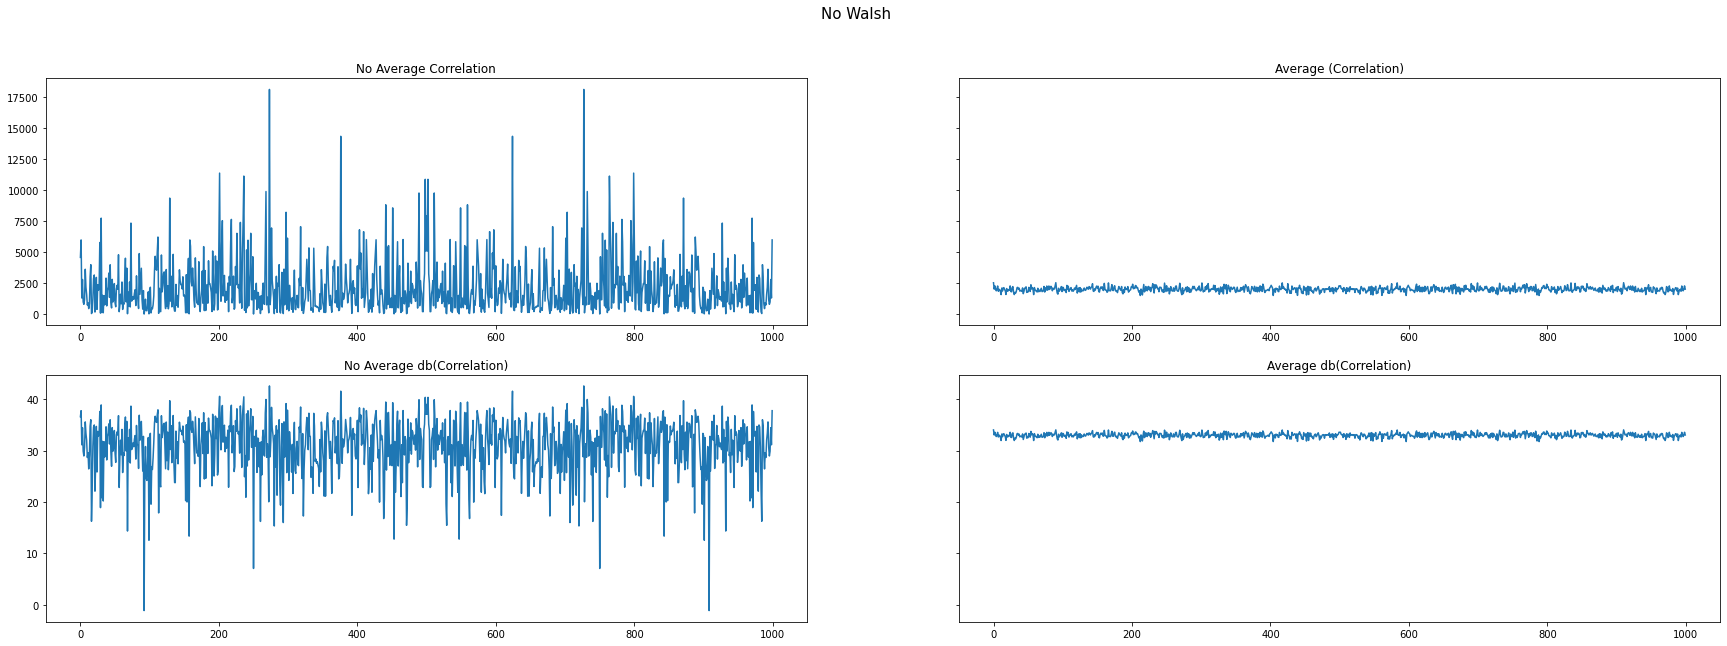

In [98]:
fig, ax = plt.subplots(2,2, figsize = (30,10), sharey='row')
nffts = 100
num_samples = 1000
variance = 2
samples1 = np.random.normal(0, np.sqrt(variance), num_samples)
fft = np.fft.fft(samples1)
pwr1 = fft*np.conj(fft)

pwrs = []
for i in range(nffts):
    samples = np.random.normal(0, np.sqrt(variance), num_samples)
    fftavg = np.fft.fft(samples)
    pwr = fftavg*np.conj(fftavg)
    pwrs.append(pwr)


meanpwr = np.mean(pwrs, axis=0)
fig.suptitle('No Walsh', fontsize=15)
ax[0,0].plot(pwr1)
ax[0,0].set_title('No Average Correlation')
ax[0,1].plot(meanpwr)
ax[0,1].set_title('Average (Correlation)')
ax[1,0].plot(db(pwr1))
ax[1,0].set_title('No Average db(Correlation)')
ax[1,1].plot(db(meanpwr))
ax[1,1].set_title('Average db(Correlation)')
print(np.mean(pwr1))
print(np.mean(meanpwr))
print(np.mean(db(pwr1)))
print(np.mean(db(meanpwr)))

(1972.8402024942377+0j)
(24.450569461780326+0j)
(30.618167461833874+0j)
(20.343267888749978+5.8122432673662425j)


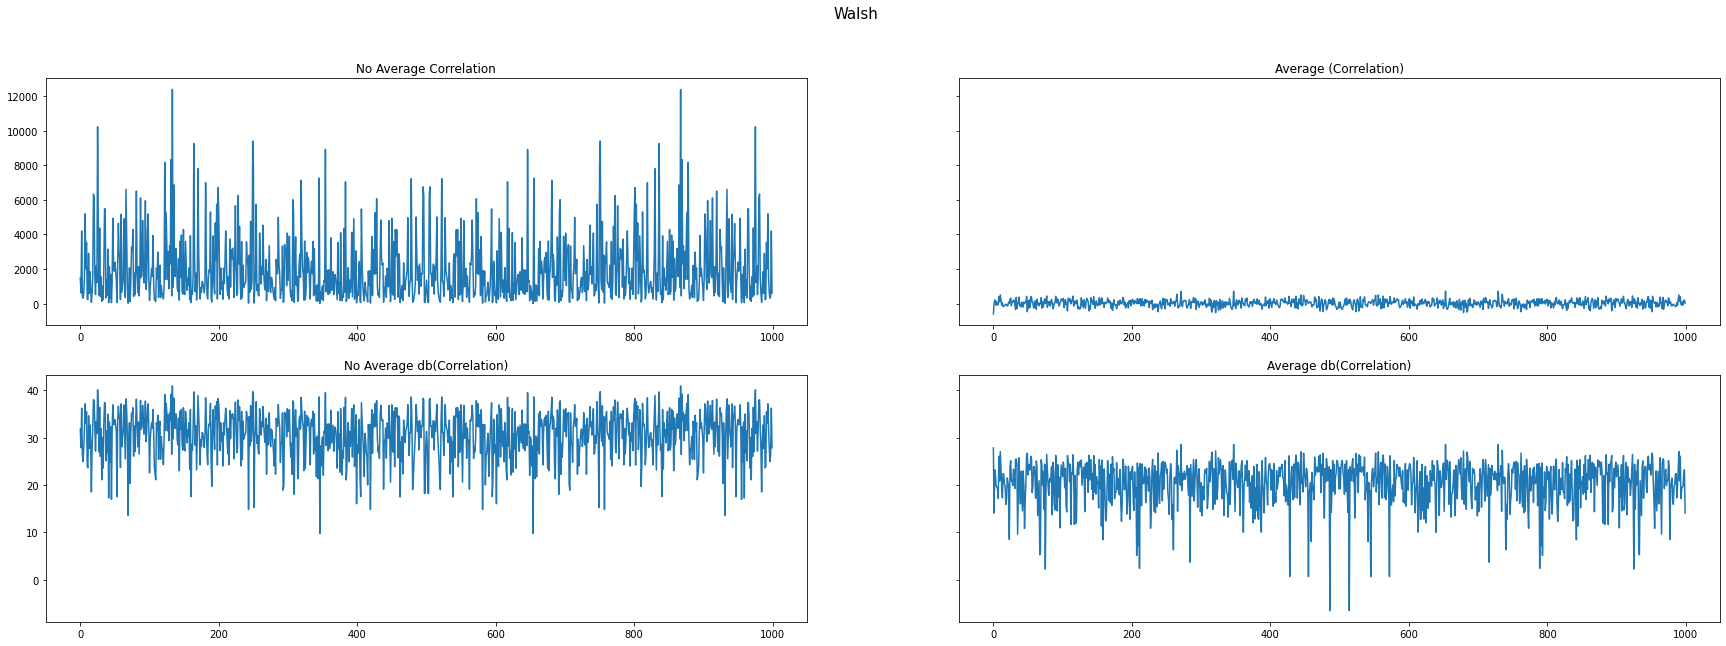

In [100]:
fig, ax = plt.subplots(2,2, figsize = (30,10), sharey='row')
nffts = 100
num_samples = 1000
variance = 2
samples1 = np.random.normal(0, np.sqrt(variance), num_samples)
fft = np.fft.fft(samples1)
pwr1 = fft*np.conj(fft)

pwrs = []
for i in range(nffts):
    if i < nffts//2:    
        samples = np.random.normal(0, np.sqrt(variance), num_samples)
        fftavg = np.fft.fft(samples)
        pwr = fftavg*np.conj(fftavg)
        pwrs.append(pwr)
    else:
        samples = np.random.normal(0, np.sqrt(variance), num_samples)
        fft1 = np.fft.fft(samples)
        fft2 = np.fft.fft(-samples)
        pwr = fft1*np.conj(fft2)
        pwrs.append(pwr)
    
meanpwr = np.mean(pwrs, axis=0)
fig.suptitle('Walsh', fontsize=15)
ax[0,0].plot(pwr1)
ax[0,0].set_title('No Average Correlation')
ax[0,1].plot(meanpwr)
ax[0,1].set_title('Average (Correlation)')
ax[1,0].plot(db(pwr1))
ax[1,0].set_title('No Average db(Correlation)')
ax[1,1].plot(db(meanpwr))
ax[1,1].set_title('Average db(Correlation)')
print(np.mean(pwr1))
print(np.mean(meanpwr))
print(np.mean(db(pwr1)))
print(np.mean(db(meanpwr)))

# Vary Variances

Text(0.5, 1.0, 'Variance vs db(Walsh Suppression Power)')

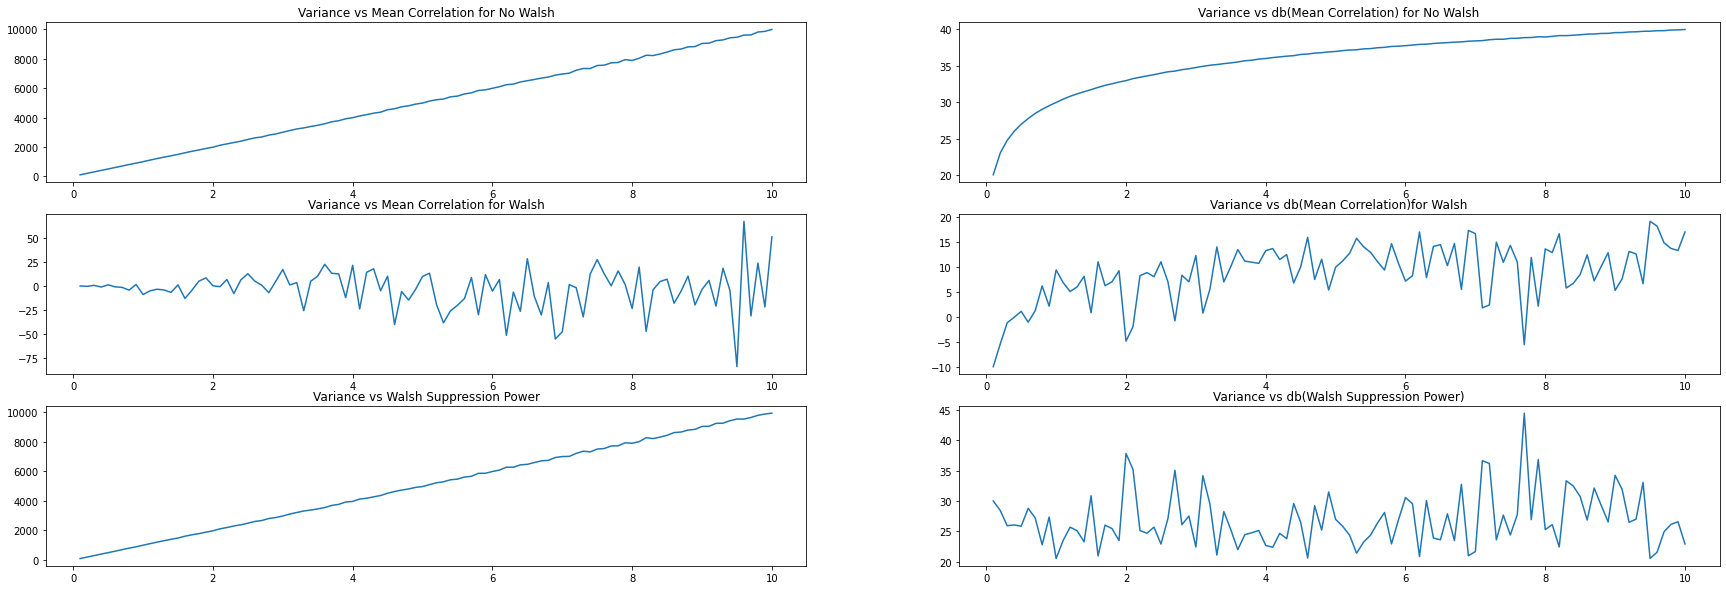

In [102]:
fig, ax = plt.subplots(3,2, figsize = (30,10))
nffts = 100
num_samples = 1000
variances = np.linspace(.1,10,100)

prepwr = []
postpwr = []

for j in range(len(variances)):
    pwrsnowalsh = []
    pwrswalsh = []
    for i in range(nffts):
        if i < nffts//2:    
            samples = np.random.normal(0, np.sqrt(variances[j]), num_samples)
            fftavg = np.fft.fft(samples)
            pwr = fftavg*np.conj(fftavg)
            pwrswalsh.append(pwr)
            pwrsnowalsh.append(pwr)
            
        else:
            samples = np.random.normal(0, np.sqrt(variances[j]), num_samples)
            fft1 = np.fft.fft(samples)
            fft2 = np.fft.fft(-samples)
            pwrnowalsh= fft1*np.conj(fft1)
            pwrwal = fft1*np.conj(fft2)
            pwrswalsh.append(pwrwal)
            pwrsnowalsh.append(pwrnowalsh)
            
    meannowalsh = np.mean(pwrsnowalsh,axis=0)
    meanwalsh = np.mean(pwrswalsh, axis=0)
    prepwr.append(np.mean(meannowalsh))
    postpwr.append(np.mean(meanwalsh))

prepwr = np.array(prepwr)
postpwr = np.array(postpwr)

ax[0,0].plot(variances, prepwr)
ax[0,0].set_title('Variance vs Mean Correlation for No Walsh')
ax[0,1].plot(variances, db(prepwr))
ax[0,1].set_title('Variance vs db(Mean Correlation) for No Walsh')
ax[1,0].plot(variances, postpwr)
ax[1,0].set_title('Variance vs Mean Correlation for Walsh')
ax[1,1].plot(variances, db(postpwr))
ax[1,1].set_title('Variance vs db(Mean Correlation)for Walsh')
ax[2,0].plot(variances, prepwr-postpwr)
ax[2,0].set_title('Variance vs Walsh Suppression Power')
ax[2,1].plot(variances,db(prepwr)-db(postpwr))
ax[2,1].set_title('Variance vs db(Walsh Suppression Power)')

# Get Some Distributions

In [ ]:
fig, ax = plt.subplots(3,2, figsize = (30,10))
nffts = 100
num_samples = 1000
variances = np.linspace(.1,10,100)
ntrials = 100


histspre = []
histspost = []
histspredb = []
histspostdb = []

for k in range(ntrials):
    prepwr = []
    postpwr = []

    for j in range(len(variances)):
        pwrsnowalsh = []
        pwrswalsh = []
        for i in range(nffts):
            if i < nffts//2:    
                samples = np.random.normal(0, np.sqrt(variances[j]), num_samples)
                fftavg = np.fft.fft(samples)
                pwr = fftavg*np.conj(fftavg)
                pwrswalsh.append(pwr)
                pwrsnowalsh.append(pwr)
            
            else:
                samples = np.random.normal(0, np.sqrt(variances[j]), num_samples)
                fft1 = np.fft.fft(samples)
                fft2 = np.fft.fft(-samples)
                pwrnowalsh= fft1*np.conj(fft1)
                pwrwal = fft1*np.conj(fft2)
                pwrswalsh.append(pwrwal)
                pwrsnowalsh.append(pwrnowalsh)
            
        meannowalsh = np.mean(pwrsnowalsh,axis=0)
        meanwalsh = np.mean(pwrswalsh, axis=0)
        prepwr.append(np.mean(meannowalsh))
        postpwr.append(np.mean(meanwalsh))

    prepwr = np.array(prepwr)
    postpwr = np.array(postpwr)
    histspre.append(prepwr)
    histspost.append(postpwr)
    histspredb.append(db(prepwr))
    histspostdb.append(db(postpwr))
    

meanhistvalpre = []
meanhistvalpost = []
meanhistvalpredb = []
meanhistvalpostdb = []

for i in range(len(variances)):
    meanhistvalpre.append(np.mean([item[i] for item in histspre]))
    meanhistvalpredb.append(np.mean([item[i] for item in histspredb]))
    meanhistvalpost.append(np.mean([item[i] for item in histspost]))
    meanhistvalpostdb.append(np.mean([item[i] for item in histspostdb]))

    
    
ax[0,0].plot(variance, meanhistvalpre)
ax[0,0].set_title('Variance vs Mean Correlation for No Walsh')
ax[0,1].plot(variance, meanhistvalpredb)
ax[0,1].set_title('Variance vs db(Mean Correlation) for No Walsh')
ax[1,0].plot(variance,meanhistvalpost)
ax[1,0].set_title('Variance vs Mean Correlation for Walsh')
ax[1,1].plot(variance, meanhistvalpostdb)
ax[1,1].set_title('Variance vs db(Mean Correlation)for Walsh')
ax[2,0].plot(variance, meanhistvalpre-meanhistvalpost)
ax[2,0].set_title('Variance vs Walsh Suppression Power')
ax[2,1].plot(variance,meanhistvalpredb-meanhistvalpostdb)
ax[2,1].set_title('Variance vs db(Walsh Suppression Power)')

# Vary Nffts

In [ ]:
fig, ax = plt.subplots(3,2, figsize = (30,10), sharey='row')
nffts = np.linspace(1,1000,1000)
num_samples = 1000
variance = 5

prepwr = []
postpwr = []

for j in range(len(nffts)):
    pwrsnowalsh = []
    pwrswalsh = []
    for i in range(nffts):
        if i < nffts//2:    
            samples = np.random.normal(0, np.sqrt(variances[j]), num_samples)
            fftavg = np.fft.fft(samples)
            pwr = fftavg*np.conj(fftavg)
            pwrswalsh.append(pwr)
            pwrsnowalsh.append(pwr)
            
        else:
            samples = np.random.normal(0, np.sqrt(variances[j]), num_samples)
            fft1 = np.fft.fft(samples)
            fft2 = np.fft.fft(-samples)
            pwrnowalsh= fft1*np.conj(fft1)
            pwrwal = fft1*np.conj(fft2)
            pwrswalsh.append(pwrwal)
            pwrsnowalsh.append(pwrnowalsh)
            
    meannowalsh = np.mean(pwrsnowalsh,axis=0)
    meanwalsh = np.mean(pwrswalsh, axis=0)
    prepwr.append(np.mean(meannowalsh))
    postpwr.append(np.mean(meanwalsh))

prepwr = np.array(prepwr)
postpwr = np.array(postpwr)

ax[0,0].plot(nffts, prepwr)
ax[0,0].set_title('Variance vs Mean Correlation for No Walsh')
ax[0,1].plot(nffts, db(prepwr))
ax[0,1].set_title('Variance vs db(Mean Correlation) for No Walsh')
ax[1,0].plot(nffts, postpwr)
ax[1,0].set_title('Variance vs Mean Correlation for Walsh')
ax[1,1].plot(nffts, db(postpwr))
ax[1,1].set_title('Variance vs db(Mean Correlation)for Walsh')
ax[2,0].plot(nffts, prepwr-postpwr)
ax[2,0].set_title('Variance vs Walsh Suppression Power')
ax[2,1].plot(nffts,db(prepwr)-db(postpwr))
ax[2,1].set_title('Variance vs db(Walsh Suppression Power)')